In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import mean_squared_error, log_loss
import math

In [ ]:
!pip install linearmodels

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
import plotnine as p
from linearmodels.iv import IV2SLS


# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file):
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

card = read_data("card.dta")

#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa",
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 30 May 2025   Prob (F-statistic):          1.97e-232
Time:                        20:17:10   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#2SLS
iv_reg = IV2SLS.from_formula("lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc4 ]", card).fit()
iv_reg.summary

/usr/local/lib/python3.11/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                      0.2513
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2498
No. Observations:                3003   F-statistic:                    892.71
Date:                Fri, May 30 2025   P-value (F-stat)                0.0000
Time:                        20:17:10   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.1625     0.8349     4.9857     0.0000      2.5262      5.7988
exper          0.0556     0.0199     2.7980     0.0051      0.0166      0.0945
black         -0.1157     0.0496    -2.3343     0.0196     -0.2128     -0.0186
south         -0.1132     0.0229    -4.9314     0.0000     -0.1581     -0.0682
married       -0.0320     0.0051    -6.3037     0.0000     -0.0419     -0.0220
smsa           0.1477     0.0303     4.8721     0.0000      0.0883      0.2071
educ           0.1242     0.0492     2.5258     0.0115      0.0278      0.2205
==============================================================================

Endogenous: educ
Instruments: nearc4
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [ ]:
RANDOM_SEED=0
np.random.seed(RANDOM_SEED)

In [ ]:
card.columns

Index(['id', 'nearc2', 'nearc4', 'educ', 'age', 'fatheduc', 'motheduc',
       'weight', 'momdad14', 'sinmom14', 'step14', 'reg661', 'reg662',
       'reg663', 'reg664', 'reg665', 'reg666', 'reg667', 'reg668', 'reg669',
       'south66', 'black', 'smsa', 'south', 'smsa66', 'wage', 'enroll', 'KWW',
       'IQ', 'married', 'libcrd14', 'exper', 'lwage', 'expersq', 'u_lwage',
       'lwage_hat', 'u_educ'],
      dtype='object')

In [ ]:
card.shape

(3010, 37)

In [ ]:
card.isnull().sum()

,0
id,0
nearc2,0
nearc4,0
educ,0
age,0
fatheduc,690
motheduc,353
weight,0
momdad14,0
sinmom14,0


In [ ]:
card.dropna(inplace=True)
outcome = card['lwage']
#treatment = card['educ']
treatment = (card['educ'] >= 13).astype(int)
instrument = card['nearc4']
block1 = card[['exper', 'black', 'south', 'married', 'smsa']]
block2 = card[['exper', 'black', 'south', 'married', 'smsa', 'motheduc','fatheduc', 'IQ','KWW']]

In [ ]:
def make_mu_model(model, params={}):
  return model(**params)

def make_m_model(model, params={}):
  return model(**params)

def make_p_model(model, params={}):
  return model(**params)

In [ ]:
from sklearn.impute import SimpleImputer
# helper functions to implement the cross fitting

def p_k_fold_fit_and_predict(make_model, X:pd.DataFrame, Z:np.array, n_splits:int, model, params):
    """
    Implements K fold cross-fitting for the model predicting the instrument Z.
    That is,
    1. Split data into K folds
    2. For each fold j, the model is fit on the other K-1 folds
    3. The fitted model is used to make predictions for each data point in fold j
    Returns an array containing the predictions

    Args:
    model: function that returns sklearn model (which implements fit and predict_prob)
    X: dataframe of variables to adjust for
    Z: array of instruments
    n_splits: number of splits to use
    """
    predictions = np.full_like(Z, np.nan, dtype=float)
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)

    for train_index, test_index in kf.split(X, Z):
      X_train = X.iloc[train_index]
      X_test = X.iloc[test_index]
      Z_train = Z.iloc[train_index]

      imputer = SimpleImputer(strategy='mean', add_indicator=True)
      X_train_imputed = imputer.fit_transform(X_train)
      X_test_imputed = imputer.transform(X_test)

      g = make_model(model, params)
      g.fit(X_train_imputed, Z_train)

      # get predictions for split
      predictions[test_index] = g.predict_proba(X_test_imputed)[:, 1]

    assert np.isnan(predictions).sum() == 0
    return predictions


def m_k_fold_fit_and_predict(make_model, X:pd.DataFrame, Z:np.array, A:np.array, n_splits:int, model, params):
    """
    Implements K fold cross-fitting for the model predicting the outcome Y.
    That is,
    1. Split data into K folds
    2. For each fold j, the model is fit on the other K-1 folds
    3. The fitted model is used to make predictions for each data point in fold j
    Returns two arrays containing the predictions for all units untreated, all units treated

    Args:
    model: function that returns sklearn model (that implements fit and either predict_prob or predict)
    X: dataframe of variables to adjust for
    Z: array of instruments
    A: array of treatments
    n_splits: number of splits to use
    """
    predictions0 = np.full_like(A, np.nan, dtype=float)
    predictions1 = np.full_like(A, np.nan, dtype=float)
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)

    # include the treatment as input feature
    X_zx = X.copy()
    X_zx["Z"] = Z

    # for predicting A under Z=1 / Z=0 status for each data point
    X0 = X_zx.copy()
    X0["Z"] = 0
    X1 = X_zx.copy()
    X1["Z"] = 1

    for train_index, test_index in kf.split(X_zx, A):
      X_train = X_zx.iloc[train_index]
      A_train = A.iloc[train_index]

      imputer = SimpleImputer(strategy='mean', add_indicator=True)
      X_train_imputed = imputer.fit_transform(X_train)
      X0_test_imputed = imputer.transform(X0.iloc[test_index])
      X1_test_imputed = imputer.transform(X1.iloc[test_index])

      m = make_model(model, params)
      m.fit(X_train_imputed, A_train)

      predictions0[test_index] = m.predict_proba(X0_test_imputed)[:,1]
      predictions1[test_index] = m.predict_proba(X1_test_imputed)[:,1]

    assert np.isnan(predictions0).sum() == 0
    assert np.isnan(predictions1).sum() == 0
    return predictions0, predictions1

def mu_k_fold_fit_and_predict(make_model, X:pd.DataFrame, Z:np.array, y:np.array, n_splits:int, output_type:str, model, params):
    """
    Implements K fold cross-fitting for the model predicting the outcome Y.
    That is,
    1. Split data into K folds
    2. For each fold j, the model is fit on the other K-1 folds
    3. The fitted model is used to make predictions for each data point in fold j
    Returns two arrays containing the predictions for all units untreated, all units treated

    Args:
    model: function that returns sklearn model (that implements fit and either predict_prob or predict)
    X: dataframe of variables to adjust for
    Z: array of instruments
    y: array of outcomes
    n_splits: number of splits to use
    output_type: type of outcome, "binary" or "continuous"

    """
    predictions0 = np.full_like(y, np.nan, dtype=float)
    predictions1 = np.full_like(y, np.nan, dtype=float)
    if output_type == 'binary':
      kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    elif output_type == 'continuous':
      kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)

    # include the treatment as input feature
    X_zx = X.copy()
    X_zx["Z"] = Z

    # for predicting effect under treatment / control status for each data point
    X0 = X_zx.copy()
    X0["Z"] = 0
    X1 = X_zx.copy()
    X1["Z"] = 1

    for train_index, test_index in kf.split(X_zx, y):
      X_train = X_zx.iloc[train_index]
      y_train = y.iloc[train_index]

      imputer = SimpleImputer(strategy='mean', add_indicator=True)
      X_train_imputed = imputer.fit_transform(X_train)
      X0_test_imputed = imputer.transform(X0.iloc[test_index])
      X1_test_imputed = imputer.transform(X1.iloc[test_index])

      mu = make_model(model, params)
      mu.fit(X_train_imputed, y_train)

      if output_type =='binary':
        predictions0[test_index] = mu.predict_proba(X0_test_imputed)[:, 1]
        predictions1[test_index] = mu.predict_proba(X1_test_imputed)[:, 1]
      elif output_type == 'continuous':
        predictions0[test_index] = mu.predict(X0_test_imputed)
        predictions1[test_index] = mu.predict(X1_test_imputed)

    assert np.isnan(predictions0).sum() == 0
    assert np.isnan(predictions1).sum() == 0
    return predictions0, predictions1

In [ ]:
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

m_models = [LogisticRegression, RandomForestClassifier, XGBClassifier]
m_params = [{
              "penalty": "l2",
              "C": 1.0,
              "solver": "lbfgs",
              "max_iter": 1000,
              "random_state": 0,
              "class_weight": "balanced"
            },
            {
              "n_estimators": 200,
              "max_depth": 7,
              "min_samples_split": 5,
              "min_samples_leaf": 3,
              "random_state": 0,
              "class_weight": "balanced"
            },
            {
              "n_estimators": 200,
              "max_depth": 4,
              "learning_rate": 0.05,
              "subsample": 0.8,
              "colsample_bytree": 0.8,
              "random_state": 0,
              "eval_metric": "logloss"
            }]

model_names = ["Logistic Regression", "Random Forest", "XGBoost"]
auc = []
logloss = []

for i in range(len(m_models)):
  m0,m1= m_k_fold_fit_and_predict(make_m_model, X=block1, Z=instrument, A=treatment, n_splits=10, model=m_models[i], params=m_params[i])
  auc.append(roc_auc_score(treatment, m1))
  logloss.append(log_loss(treatment, m1))

results = pd.DataFrame({'Model':model_names, 'AUC':auc, 'Log Loss':logloss})
results

,Model,AUC,Log Loss
0,Logistic Regression,0.817605,0.513437
1,Random Forest,0.817901,0.483326
2,XGBoost,0.816526,0.462963


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

mu_models = [Ridge, RandomForestRegressor, XGBRegressor]
mu_params = [{
                "alpha": 1.0,
                "fit_intercept": True,
                "solver": "auto",
                "random_state": 0
             },
             {
                "n_estimators": 100,
                "max_depth": 10,
                "min_samples_split": 4,
                "min_samples_leaf": 2,
                "random_state": 0
             },
             {
                "n_estimators": 200,
                "max_depth": 4,
                "learning_rate": 0.05,
                "subsample": 0.9,
                "colsample_bytree": 0.8,
                "random_state": 0
             }]

model_names = ["Ridge", "Random Forest", "XGBoost"]
m1_mse = []
m0_mse = []
m1r2 = []
m0r2 = []

mask = (instrument == 1)

for i in range(len(mu_models)):
  mu0,mu1= mu_k_fold_fit_and_predict(make_mu_model, X=block1, Z=instrument, y=outcome, n_splits=10, output_type="continuous", model=mu_models[i], params=mu_params[i])
  m1_mse.append(mean_squared_error(outcome[mask], mu1[mask]))
  m0_mse.append(mean_squared_error(outcome[~mask], mu0[~mask]))
  m1r2.append(r2_score(outcome[mask], mu1[mask]))
  m0r2.append(r2_score(outcome[~mask], mu0[~mask]))

results = pd.DataFrame({'Model':model_names, 'mu1 MSE':m1_mse, 'mu1 R-squared':m1r2, 'mu0 MSE':m0_mse, 'mu0 R-squared':m0r2})
results

,Model,mu1 MSE,mu1 R-squared,mu0 MSE,mu0 R-squared
0,Ridge,0.162580,0.108299,0.136114,0.118324
1,Random Forest,0.169990,0.067657,0.153844,0.003476
2,XGBoost,0.163629,0.102548,0.142453,0.077265


In [ ]:
p_models = [LogisticRegression, RandomForestClassifier, XGBClassifier]
p_params = [{
              "penalty": "l2",
              "C": 1.0,
              "solver": "lbfgs",
              "max_iter": 1000,
              "random_state": 0
            },
            {
              "n_estimators": 100,
              "max_depth": 6,
              "min_samples_split": 10,
              "min_samples_leaf": 5,
              "random_state": 0,
              "class_weight": "balanced"
            },
            {
              "n_estimators": 200,
              "max_depth": 3,
              "learning_rate": 0.05,
              "subsample": 0.8,
              "colsample_bytree": 0.8,
              "reg_lambda": 1.0,
              "random_state": 0,
              "eval_metric": "logloss"
            }]

model_names = ["Logistic Regression", "Random Forest", "XGBoost"]
auc = []
logloss = []

for i in range(len(p_models)):
  p = p_k_fold_fit_and_predict(make_p_model, X=block2, Z=instrument, n_splits=10, model=p_models[i], params=p_params[i])
  auc.append(roc_auc_score(instrument, p))
  logloss.append(log_loss(instrument, p))

results = pd.DataFrame({'Model':model_names, 'AUC':auc, 'Log Loss':logloss})
results

,Model,AUC,Log Loss
0,Logistic Regression,0.696878,0.552567
1,Random Forest,0.695661,0.608136
2,XGBoost,0.692475,0.556999


In [ ]:
p = p_k_fold_fit_and_predict(make_p_model, X=block1, Z=instrument, n_splits=10, model=p_models[0], params=p_params[0])
m0,m1= m_k_fold_fit_and_predict(make_m_model, X=block1, Z=instrument, A=treatment, n_splits=10, model=m_models[2], params=m_params[2])
mu0,mu1= mu_k_fold_fit_and_predict(make_mu_model, X=block1, Z=instrument, y=outcome, n_splits=10, output_type="continuous", model=mu_models[0], params=mu_params[0])

In [ ]:
data_and_nuisance_estimates = pd.DataFrame({'p': p, 'mu0': mu0, 'mu1': mu1, 'm1': m1, 'm0': m0,
                                            'Z': instrument, 'A': treatment, 'Y': outcome})
data_and_nuisance_estimates.head()

,p,mu0,mu1,m1,m0,Z,A,Y
1,0.825135,6.480223,6.502489,0.607938,0.522889,0.0,0,6.175867
2,0.804070,6.577396,6.600676,0.034703,0.012106,0.0,0,6.580639
3,0.820931,6.490100,6.513380,0.564240,0.455705,1.0,0,5.521461
4,0.804070,6.574958,6.597224,0.030904,0.012381,1.0,0,6.591674
5,0.830000,6.461001,6.484282,0.582116,0.441765,1.0,0,6.214608


(array([0.04183473, 0.15897196, 0.12550418, 4.50978352, 2.89496308,
        3.6563551 , 1.2550418 , 0.6275209 , 0.10877029, 0.00836695]),
 array([-0.29407704, -0.21937833, -0.14467962, -0.06998092,  0.00471779,
         0.0794165 ,  0.15411521,  0.22881391,  0.30351262,  0.37821133,
         0.45291004]),
 <BarContainer object of 10 artists>)

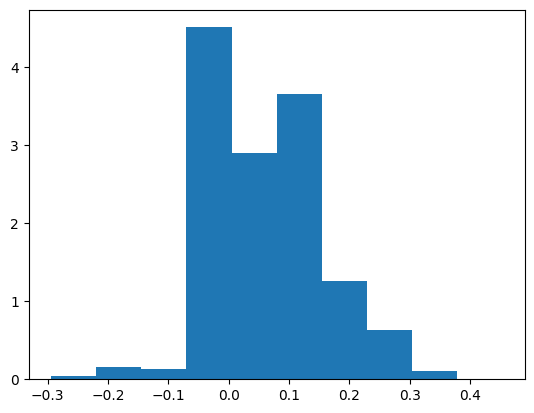

In [ ]:
# check relevance
from matplotlib.pyplot import hist
hist(m1-m0, density=True)

In [ ]:
(m1-m0).mean()

np.float64(0.06803430496162037)

In [ ]:
def late_estimator(mu1, mu0, m1, m0, p, Z, A, Y, prob = None):
  '''
  Estimator for LATE
  '''
  n = len(Y)
  phi_zy = mu1 - mu0 + Z*(Y-mu1)/p - (1-Z)*(Y-mu0)/(1-p)
  phi_za = m1 - m0 + Z*(A-m1)/p - (1-Z)*(A-m0)/(1-p)

  tau_za = phi_za.mean()
  tau_hat = phi_zy.mean()/tau_za
  phi = phi_zy - phi_za * tau_hat

  std_hat = math.sqrt((phi**2).mean()/tau_za**2/n)

  return tau_hat, std_hat

In [ ]:
from scipy.stats import norm

tau_hat, std_hat = late_estimator(**data_and_nuisance_estimates)
print(f"The estimate is {tau_hat} pm {1.96*std_hat}")

p_value = 2 * (1 - norm.cdf(np.abs(tau_hat/std_hat)))
p_value

The estimate is 0.3416934488441468 pm 0.6087290082901557


np.float64(0.2712482073906468)

In [ ]:
n = len(mu1)
num = mu1 - mu0
denom = m1 - m0

estimate = num.mean() / denom.mean()

se = np.sqrt(np.var(num - estimate * denom, ddof=1) / n) / denom.mean()

estimate, se

(np.float64(0.3213809445431978), np.float64(0.01086026972183152))

In [ ]:
from scipy.stats import norm

p_value = 2 * (1 - norm.cdf(np.abs(estimate/se)))
p_value

np.float64(0.0)

In [ ]:
model_names = ["Logistic Regression", "Random Forest", "XGBoost"]
auc = []
logloss = []

for i in range(len(m_models)):
  m0,m1= m_k_fold_fit_and_predict(make_m_model, X=block2, Z=instrument, A=treatment, n_splits=10, model=m_models[i], params=m_params[i])
  auc.append(roc_auc_score(treatment, m1))
  logloss.append(log_loss(treatment, m1))

results = pd.DataFrame({'Model':model_names, 'AUC':auc, 'Log Loss':logloss})
results

,Model,AUC,Log Loss
0,Logistic Regression,0.894905,0.403124
1,Random Forest,0.906798,0.386740
2,XGBoost,0.912428,0.359067


In [ ]:
model_names = ["Ridge", "Random Forest", "XGBoost"]
m1_mse = []
m0_mse = []
m1r2 = []
m0r2 = []

mask = (instrument == 1)

for i in range(len(mu_models)):
  mu0,mu1= mu_k_fold_fit_and_predict(make_mu_model, X=block2, Z=instrument, y=outcome, n_splits=10, output_type="continuous", model=mu_models[i], params=mu_params[i])
  m1_mse.append(mean_squared_error(outcome[mask], mu1[mask]))
  m0_mse.append(mean_squared_error(outcome[~mask], mu0[~mask]))
  m1r2.append(r2_score(outcome[mask], mu1[mask]))
  m0r2.append(r2_score(outcome[~mask], mu0[~mask]))

results = pd.DataFrame({'Model':model_names, 'mu1 MSE':m1_mse, 'mu1 R-squared':m1r2, 'mu0 MSE':m0_mse, 'mu0 R-squared':m0r2})
results

,Model,mu1 MSE,mu1 R-squared,mu0 MSE,mu0 R-squared
0,Ridge,0.150849,0.172640,0.125914,0.184392
1,Random Forest,0.157532,0.135986,0.135169,0.124444
2,XGBoost,0.156785,0.140083,0.135623,0.121502


In [ ]:
p = p_k_fold_fit_and_predict(make_p_model, X=block2, Z=instrument, n_splits=10, model=p_models[0], params=p_params[0])
m0,m1= m_k_fold_fit_and_predict(make_m_model, X=block2, Z=instrument, A=treatment, n_splits=10, model=m_models[2], params=m_params[2])
mu0,mu1= mu_k_fold_fit_and_predict(make_mu_model, X=block2, Z=instrument, y=outcome, n_splits=10, output_type="continuous", model=mu_models[0], params=mu_params[0])

(array([ 0.04771873,  0.03181249,  0.19087492,  0.52490604, 13.20218215,
         5.96484133,  3.54709231,  1.28840573,  0.52490604,  0.12724995]),
 array([-0.16727585, -0.1279831 , -0.08869035, -0.04939761, -0.01010486,
         0.02918789,  0.06848063,  0.10777338,  0.14706613,  0.18635888,
         0.22565162]),
 <BarContainer object of 10 artists>)

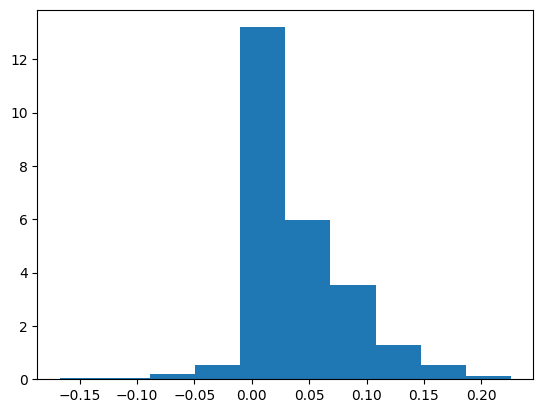

In [ ]:
# check relevance
from matplotlib.pyplot import hist
hist(m1-m0, density=True)

In [ ]:
(m1-m0).mean()

np.float64(0.03542238325142535)

In [ ]:
data_and_nuisance_estimates = pd.DataFrame({'p': p, 'mu0': mu0, 'mu1': mu1, 'm1': m1, 'm0': m0,
                                            'Z': instrument, 'A': treatment, 'Y': outcome})
data_and_nuisance_estimates.head()

,p,mu0,mu1,m1,m0,Z,A,Y
1,0.813738,6.386148,6.403416,0.268482,0.216341,0.0,0,6.175867
2,0.819943,6.651152,6.670343,0.200070,0.122673,0.0,0,6.580639
3,0.819904,6.316779,6.335970,0.027804,0.031792,1.0,0,5.521461
4,0.817326,6.519985,6.537253,0.033313,0.021430,1.0,0,6.591674
5,0.803258,6.427843,6.447034,0.393839,0.296044,1.0,0,6.214608


In [ ]:
tau_hat, std_hat = late_estimator(**data_and_nuisance_estimates)
print(f"The estimate is {tau_hat} pm {1.96*std_hat}")

The estimate is 0.387949817265708 pm 0.9769975075464243


In [ ]:
p_value = 2 * (1 - norm.cdf(np.abs(tau_hat/std_hat)))
p_value

np.float64(0.4364015372295631)

Text(0, 0.5, 'Frequency')

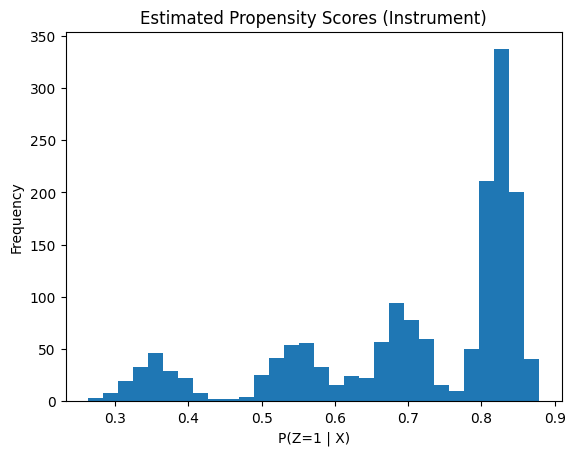

In [ ]:
import matplotlib.pyplot as plt

plt.hist(p, bins=30)
plt.title("Estimated Propensity Scores (Instrument)")
plt.xlabel("P(Z=1 | X)")
plt.ylabel("Frequency")

In [ ]:
np.mean(p > 0.95)

np.float64(0.0)